In [ ]:
# Inference_MaskRCNN.ipynb

# 1. Imports and Setup
import os
import sys
import random
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath(".")  # Update if needed
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")


# Import Mask RCNN
sys.path.append(ROOT_DIR)  
from mrcnn.config import Config
from mrcnn import model as modellib, visualize
from mrcnn.utils import Dataset

# Suppress TensorFlow warnings
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Configuration Class (Same as training)
class InferenceConfig(Config):
    NAME = "balloon"
    NUM_CLASSES = 1 + 6  # background + 6 custom classes
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.8

config = InferenceConfig()
config.display()

# 3. Class Names
class_names = [
    "BG", "broken part", "crack", "dent", "lamp broken", "missing part", "scratch"
]

# 4. Create Inference Model
from mrcnn import model as modellib

#MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_balloon_0078.h5")  # <-- your trained model

model = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR)
MODEL_PATH = model.find_last()
model.load_weights(MODEL_PATH, by_name=True)


# 5. Load Test Images




Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                19
IMAGE_MIN_DIM                  400
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

Results for: IMG-20250524-WA0031.jpg

*** No instances to display *** 



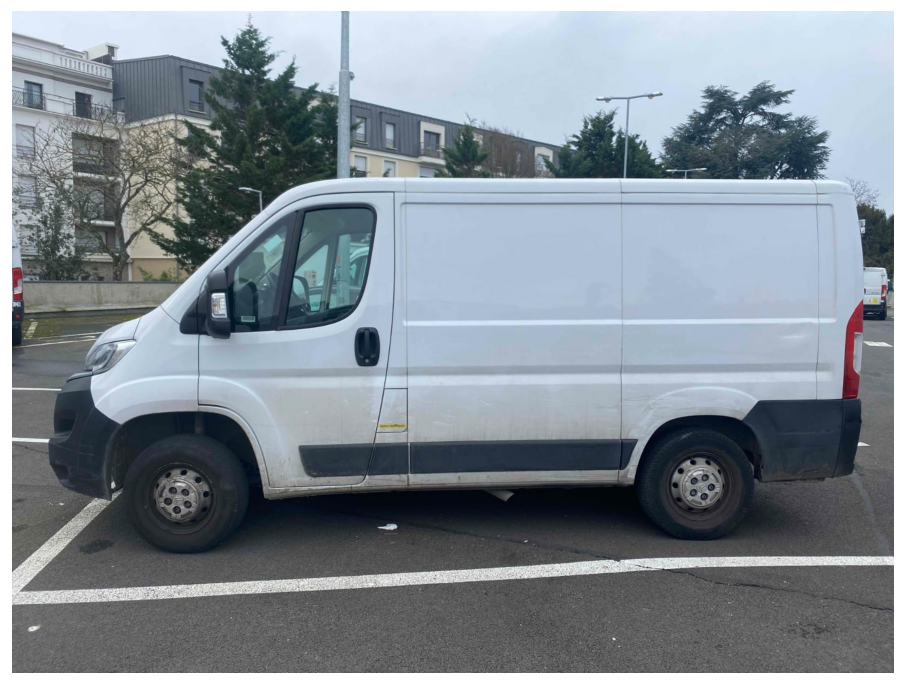

Results for: IMG-20250524-WA0032.jpg


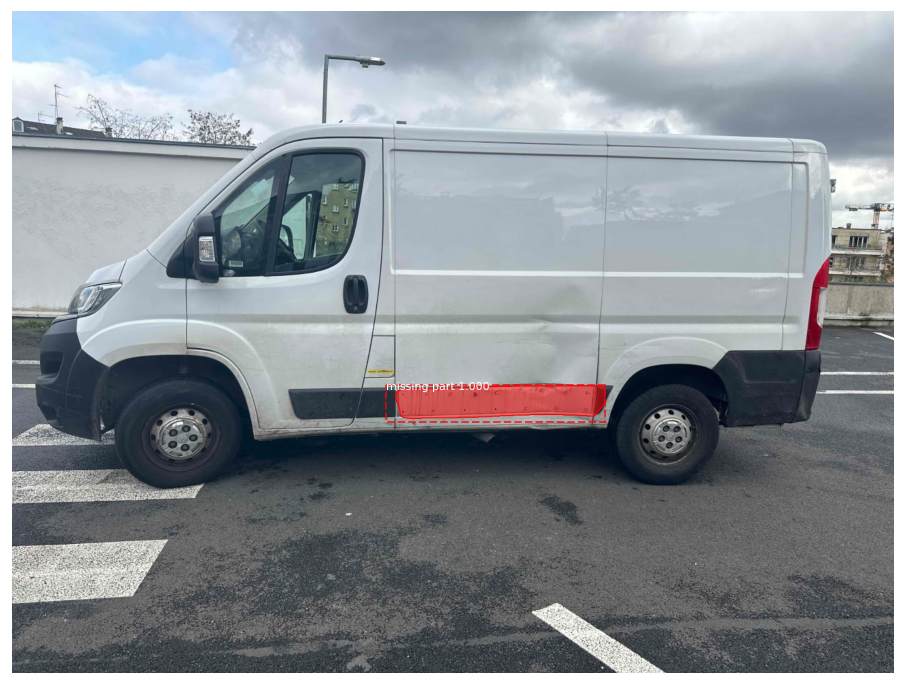

Results for: IMG-20250524-WA0033.jpg


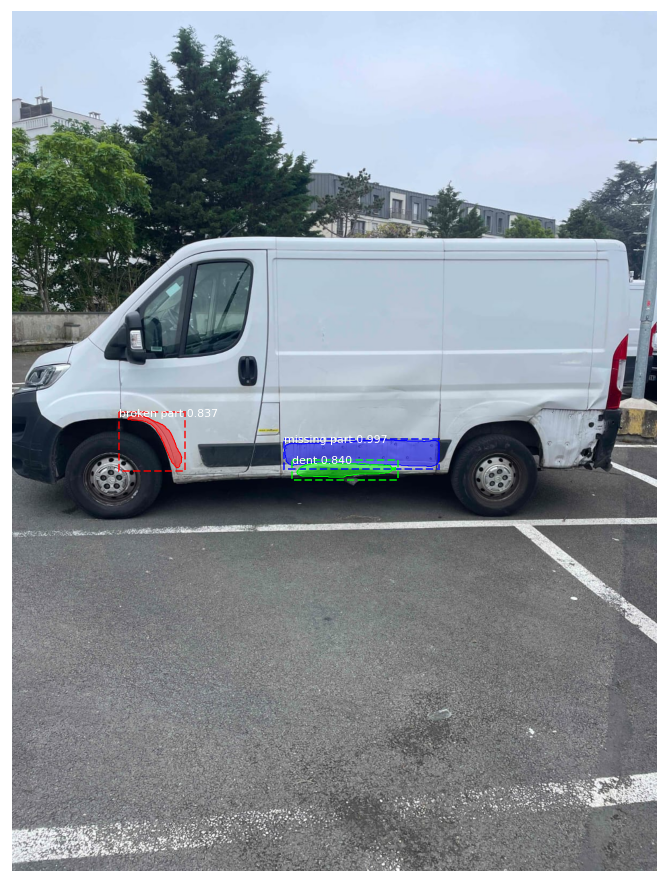

Results for: IMG-20250524-WA0034.jpg


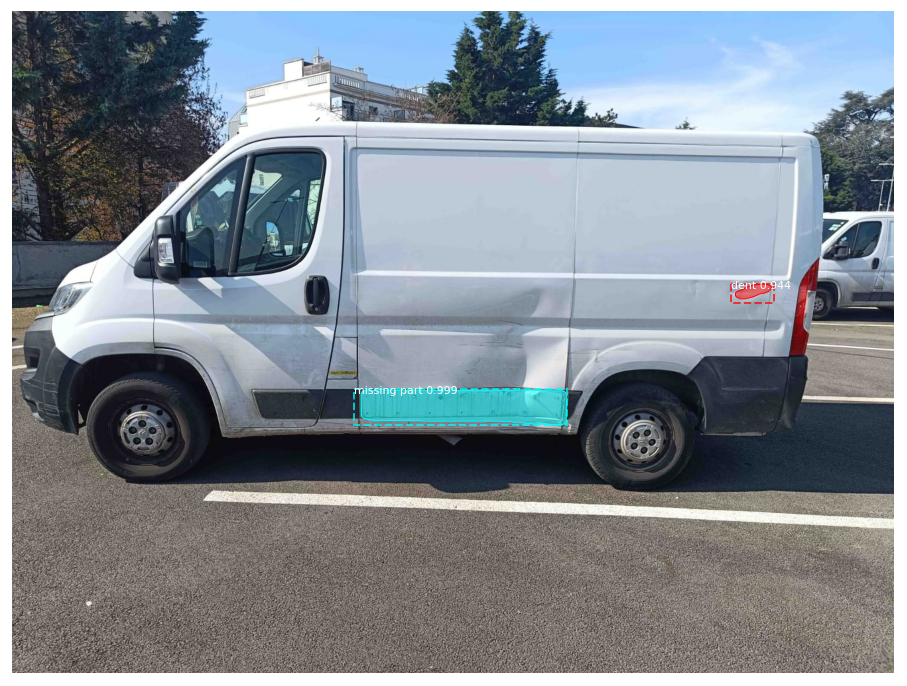

In [10]:
BALLOON_DIR = os.path.join(ROOT_DIR, "datasets/coco")
TEST_DIR = os.path.join(BALLOON_DIR, "test")  # <-- Put test images here
image_files = [os.path.join(TEST_DIR, f) for f in os.listdir(TEST_DIR) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

# 6. Inference on Test Images
for image_path in image_files:
    image = skimage.io.imread(image_path)
    
    # Ensure 3 channels
    if image.ndim != 3:
        image = skimage.color.gray2rgb(image)
    
    results = model.detect([image], verbose=0)
    r = results[0]
    
    # Show result
    print(f"Results for: {os.path.basename(image_path)}")
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'])